# load data

In [1]:
import joblib
rawdata = joblib.load("../out/collection.dump")

# zipcode extracting function

In [2]:
import collections
import numpy as np
import matplotlib.pyplot as plt
def extracttrips(rawdata,zipsize=None,by='EventZIPCode'):
    trips = []
    for key in rawdata:
        if "TrackDetail" not in rawdata[key]:
            continue
        zipcodes = []
        for step in rawdata[key]['TrackDetail']:

            if type(step) == collections.OrderedDict:
                
                zipcode = step[by]  
                if zipcode is not None:
                    if zipsize is None:
                        zipcodes.append(str(zipcode))
                    else:
                        zipcodes.append(str(zipcode)[:zipsize])
        uniquetrip= np.unique(zipcodes)
        trips.append(uniquetrip)
    return trips


# draw the count of state in each trip 

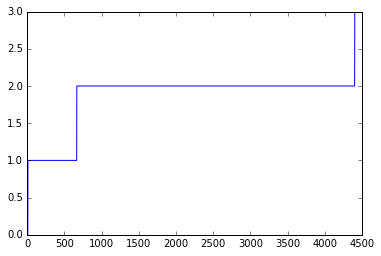

In [24]:
trips = extracttrips(rawdata,by='EventState')
tripslength = [len(x) for x in trips]
tripslength.sort()
plt.plot(tripslength)
plt.show()

# draw the count of zip code in each trip in big city level

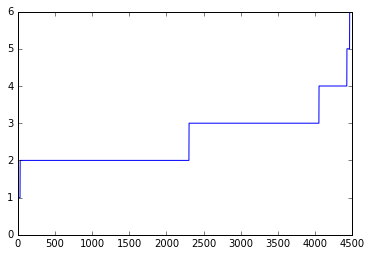

# link with more than 1 occur: 356


In [14]:

trips = extracttrips(rawdata)
tripslength = [len(x) for x in trips]
tripslength.sort()
plt.plot(tripslength)
plt.show()
import pandas as pd
links = []
for val in trips:
    links.extend([(val[i],val[i+1]) for i in range(len(val)-1)])
linksrate = pd.Series(links).value_counts()
print '# link with more than 1 occur:', (linksrate>1).sum()



In [7]:
# draw the count of zip code in each trip in small city level 

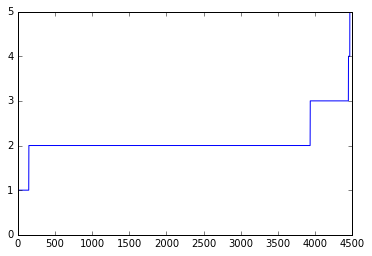

link with more than 1 occur: 416


In [13]:

trips = extracttrips(rawdata,3)
tripslength = [len(x) for x in trips]
tripslength.sort()
plt.plot(tripslength)
plt.show()
import pandas as pd
links = []
for val in trips:
    links.extend([(val[i],val[i+1]) for i in range(len(val)-1)])
linksrate = pd.Series(links).value_counts()
print 'link with more than 1 occur:', (linksrate>1).sum()

